In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
def read_parquet_by_name(name, src_path='src.csv'):
    src_df = pd.read_csv(src_path)
    result = src_df.loc[src_df['name'] == name, 'links']
    if not result.empty:
        url = result.values[0]
        df = pd.read_parquet(url)
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        return df
    else:
        raise ValueError(f"No URL found for name: {name}")

ipi = read_parquet_by_name('IPI')

In [9]:
# Impute new data
# Add new data for 2025-05-01
new_date = pd.to_datetime('2025-05-01')
new_rows = pd.DataFrame([
    {'date': new_date, 'series': 'abs', 'index': 128.5},
    {'date': new_date, 'series': 'growth_yoy', 'index': 0.3},
    {'date': new_date, 'series': 'growth_mom', 'index': 1.1}
])
ipi = pd.concat([ipi, new_rows], ignore_index=True)


In [10]:
# Filter the data
ipi_mom = ipi[ipi['series'] == 'growth_mom']
ipi_yoy = ipi[ipi['series'] == 'growth_yoy']
ipi_abs = ipi[ipi['series'] == 'abs']

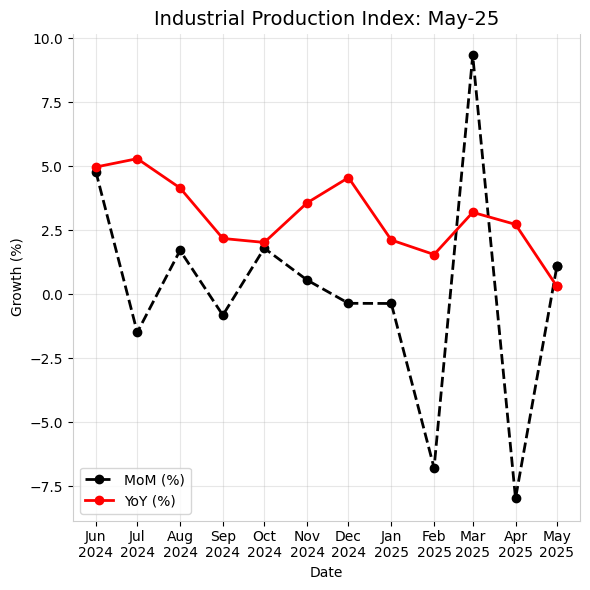

In [12]:
# Filter to the past 12 months
ipi_mom_12 = ipi_mom.sort_values('date').tail(13)
ipi_yoy_12 = ipi_yoy.sort_values('date').tail(13)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot MoM
ax.plot(
    ipi_mom_12['date'],
    ipi_mom_12['index'],
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='MoM (%)'
)

# Plot YoY
ax.plot(
    ipi_yoy_12['date'],
    ipi_yoy_12['index'],
    color='red',
    marker='o',
    linestyle='-',
    linewidth=2,
    label='YoY (%)'
)

# Set axis labels
ax.set_ylabel('Growth (%)', color='black')
ax.set_xlabel('Date', color='black')

# Set title
ax.set_title('Industrial Production Index: May-25', fontsize=14)

# Set spines color
for spine in ax.spines.values():
    spine.set_edgecolor('#cecece')
ax.spines['top'].set_color('white')

# Set tick params color
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Add grid
ax.grid(True, which='major', axis='both', alpha=0.3)

# Add legend
ax.legend(loc='lower left')

# Set x-axis major locator to MonthLocator and formatter to show abbreviated month and year
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Ensure the x-axis ticks and labels are visible and not overlapping
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0, ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
